<a href="https://colab.research.google.com/github/diaboloshogunate/GoogleColabML/blob/main/MNIST-k-means-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import seaborn as sns
from scipy.optimize import linear_sum_assignment as linear_assignment

In [125]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [126]:
X_train = X_train.reshape(len(X_train), -1)
X_train = X_train.astype(np.float32) / 255

In [127]:
kmeans = KMeans(init="random", n_clusters=10, n_init=4, random_state=0)
kmeans.fit(X_train, y_train)

KMeans(init='random', n_clusters=10, n_init=4, random_state=0)

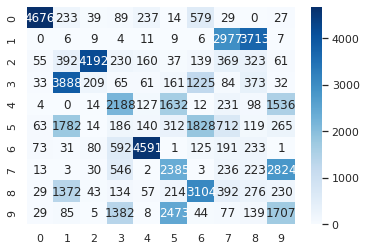

In [128]:
cm = confusion_matrix(y_train, kmeans.labels_)
sns.set()
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

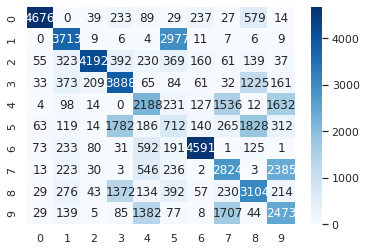

In [129]:
def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)

_, col_ind = linear_assignment(_make_cost_m(cm))
cm2 = cm[:, col_ind]
ax = sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues")

In [130]:
np.trace(cm2) / np.sum(cm)

0.53935